The task implies prediction of alcohol consumption of students of math courses and portuguese language courses, finding strongest features that model depends on

## Features description

In [28]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.cross_validation import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt


data_mat = pd.read_csv('student-mat.csv', sep=';')
data_por = pd.read_csv('student-por.csv', sep=';')

print(data_mat.describe())
print(data_por.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [29]:
data_all = pd.merge(data_mat, data_por, 
             on=["school","sex","age",
                 "address","famsize","Pstatus",
                 "Medu","Fedu","Mjob","Fjob",
                 "reason","nursery","internet"]
                )
print('Missing values in data_mat: ', data_all.isnull().sum())

Missing values in data_mat:  school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian_x      0
traveltime_x    0
studytime_x     0
failures_x      0
schoolsup_x     0
famsup_x        0
paid_x          0
activities_x    0
nursery         0
higher_x        0
internet        0
romantic_x      0
famrel_x        0
freetime_x      0
goout_x         0
Dalc_x          0
Walc_x          0
health_x        0
absences_x      0
G1_x            0
G2_x            0
G3_x            0
guardian_y      0
traveltime_y    0
studytime_y     0
failures_y      0
schoolsup_y     0
famsup_y        0
paid_y          0
activities_y    0
higher_y        0
romantic_y      0
famrel_y        0
freetime_y      0
goout_y         0
Dalc_y          0
Walc_y          0
health_y        0
absences_y      0
G1_y            0
G2_y            0
G3_y            0
dtype: int64


In [31]:
print('Count of instances with Medu == 4 in dataset:\n',
      len(data_por[data_por.Medu == 4])) 
print(data_all.columns.values)

Count of instances with Medu == 4 in dataset:
 175
['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian_x' 'traveltime_x' 'studytime_x' 'failures_x'
 'schoolsup_x' 'famsup_x' 'paid_x' 'activities_x' 'nursery' 'higher_x'
 'internet' 'romantic_x' 'famrel_x' 'freetime_x' 'goout_x' 'Dalc_x'
 'Walc_x' 'health_x' 'absences_x' 'G1_x' 'G2_x' 'G3_x' 'guardian_y'
 'traveltime_y' 'studytime_y' 'failures_y' 'schoolsup_y' 'famsup_y'
 'paid_y' 'activities_y' 'higher_y' 'romantic_y' 'famrel_y' 'freetime_y'
 'goout_y' 'Dalc_y' 'Walc_y' 'health_y' 'absences_y' 'G1_y' 'G2_y' 'G3_y']


In [32]:
# getting nominal attributes
nominal_attrs = ['Mjob', 'Fjob', 'reason', 'guardian_x', 'guardian_y'] 
columns = data_all.columns.values
nominal_binarized = pd.get_dummies(data_all[nominal_attrs])

data_all = data_all[list(set(columns) - set(nominal_attrs))]
data_all = pd.concat([data_all, nominal_binarized], axis=1)
data_all.head()

,famsup_y,health_x,nursery,famsize,sex,paid_y,G3_y,Pstatus,absences_y,traveltime_x,...,reason_course,reason_home,reason_other,reason_reputation,guardian_x_father,guardian_x_mother,guardian_x_other,guardian_y_father,guardian_y_mother,guardian_y_other
0,no,3,yes,GT3,F,no,11,A,4,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,yes,3,no,GT3,F,no,11,T,2,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,no,3,yes,LE3,F,no,12,T,6,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,yes,5,yes,GT3,F,no,14,T,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,yes,5,yes,GT3,F,no,13,T,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [33]:
RANDOM_SEED = 1995

In [34]:
""" 
Calculating Alc attribute to find out whether the student is alcoholic or not according to article

In case same students from Por and Mat classes provided different answers on alcohol consumption - 
Walc and Dalc - depending on class, average is calculated and used
"""

def get_alc(Dalc_X, Walc_X, Dalc_Y, Walc_Y):
    if Dalc_X.any() == Dalc_Y.any() and Walc_X.any() == Walc_Y.any():
        alc_numeric = (Walc_X*2 + Dalc_X*5)/7 > 3
    else:
        Dalc = 0.5*(Dalc_X + Dalc_Y)
        Walc = 0.5*(Walc_X + Walc_Y)
        alc_numeric = (Walc*2 + Dalc*5)/7 > 3
    return alc_numeric.astype(int)

alc = pd.DataFrame(get_alc(
        data_all.Dalc_x, 
        data_all.Walc_x, 
        data_all.Dalc_y, 
        data_all.Walc_y), 
    columns=['Alc'])
data_all = pd.concat([data_all, alc], axis=1)


replace_dict = {'yes' : 1, 'no' : 0, 
                'F' : 0, 'M': 1, 
                'U': 0, 'R' : 1, 
                'MS': 0, 'GP' : 1,
                'LE3' : 0, 'GT3' : 1, 
                'T' : 0, 'A' : 1}
data_all = data_all.replace(replace_dict)

"""
Now let's delete Walc and Dalc features as they are completely correlated 
with Alc feature. Not too smart to predict Alc feature with knowledge how much 
students drink
"""

data_all = data_all.drop(['Dalc_x', 'Dalc_y', 'Walc_x', 'Walc_y'], axis=1)

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cross_validation import StratifiedKFold as StratifiedKFold1

train, test = train_test_split(data_all, test_size=0.2, random_state=RANDOM_SEED)
train_y = train.Alc
train_X = train[list(set(train.columns.values) - set(['Alc']))]
test_y = test.Alc
test_X = test[list(set(test.columns.values) - set(['Alc']))]

skf = StratifiedKFold(n_splits=6, shuffle=True)
X = data_all.drop(['Alc'], axis=1)
y = data_all.Alc
for train_indices, test_indices in skf.split(X, y):
    X_train, y_train = X.ix[train_indices, :], y.ix[train_indices]
    X_test, y_test = X.ix[test_indices, :], y.ix[test_indices]
    print(X_train.shape, X_test.shape)
    
skf = StratifiedKFold1(y, n_folds=6)
for train_indices, test_indices in skf:
    X_train, y_train = X.ix[train_indices, :], y.ix[train_indices]
    X_test, y_test = X.ix[test_indices, :], y.ix[test_indices]
    print(X_train.shape, X_test.shape)

(318, 64) (64, 64)
(318, 64) (64, 64)
(318, 64) (64, 64)
(318, 64) (64, 64)
(319, 64) (63, 64)
(319, 64) (63, 64)
(318, 64) (64, 64)
(318, 64) (64, 64)
(318, 64) (64, 64)
(318, 64) (64, 64)
(319, 64) (63, 64)
(319, 64) (63, 64)


Inconsistency in sample numbers causes errors when training and fitting data, thus will be not used further

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_estimators': [2, 5, 10, 20], 
                     'criterion': ['gini', 'entropy'],
                     'max_depth' : [2, 5, 10, None]}]

clf = GridSearchCV(RFC(n_jobs=-1), tuned_parameters, cv=5)
clf.fit(train_X, train_y)
print("Best parameters set found on development set:\n")
print(clf.best_params_, '\n')
print("Grid scores on development set:\n")
print("Grid scores on development set:")
means = sorted(clf.cv_results_['mean_test_score'], reverse=True)
stds = clf.cv_results_['std_test_score']


# Getting top 5 parameters
for mean, std, params in zip(means[:5], stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" %(mean, std * 2, params))
    rfc = RFC(n_jobs=-1, 
              n_estimators=params.get('n_estimators'), 
              criterion=params.get('criterion'), 
              max_depth=params.get('max_depth'))
    rfc.fit(train_X, train_y)
    print('Accuracy = ', accuracy_score(rfc.predict(test_X), test_y))

0.915 (+/-0.0162) for {'n_estimators': 2, 'max_depth': 2, 'criterion': 'gini'}
Accuracy =  0.896103896104
0.915 (+/-0.0117) for {'n_estimators': 5, 'max_depth': 2, 'criterion': 'gini'}
Accuracy =  0.896103896104
0.915 (+/-0.0117) for {'n_estimators': 10, 'max_depth': 2, 'criterion': 'gini'}
Accuracy =  0.896103896104
0.915 (+/-0.0117) for {'n_estimators': 20, 'max_depth': 2, 'criterion': 'gini'}
Accuracy =  0.896103896104
0.915 (+/-0.0541) for {'n_estimators': 2, 'max_depth': 5, 'criterion': 'gini'}
Accuracy =  0.844155844156


Attribute ranking:
1. feature absences_y (0.143616)
2. feature sex (0.115532)
3. feature G1_x (0.091138)
4. feature G3_x (0.090865)
5. feature Medu (0.074625)
6. feature Fedu (0.059896)
7. feature absences_x (0.059896)
8. feature goout_x (0.056035)
9. feature Mjob_teacher (0.049466)
10. feature G3_y (0.037004)
11. feature traveltime_y (0.031318)
12. feature reason_other (0.030081)
13. feature freetime_y (0.029948)
14. feature romantic_y (0.027830)
15. feature paid_y (0.025790)
16. feature reason_reputation (0.024239)
17. feature studytime_x (0.021900)
18. feature studytime_y (0.016113)
19. feature famrel_y (0.008957)
20. feature activities_y (0.004326)
21. feature Fjob_services (0.001047)
22. feature freetime_x (0.000379)


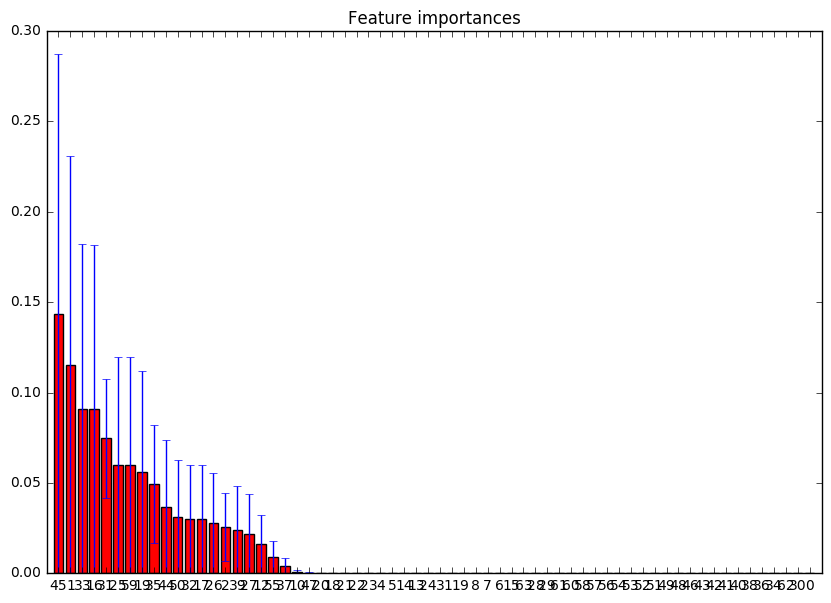

In [78]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Attribute ranking:")

"""
Taking only those features that matter => importance > 0
"""
for f in range(train_X.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. feature %s (%f)" 
              % (f + 1, 
                 train_X.columns.values[indices[f]], 
                 importances[indices[f]]))


plt.figure(figsize=(10,7))
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

# GradientBoostingClassifier


In [92]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

tuned_parameters = [{'loss': ['deviance', 'exponential'], 
                     'presort' : [True, False],
                     'criterion' : ['friedman_mse', 'mae'],
                     'n_estimators' : [100, 150, 200]}]

clf = GridSearchCV(GBC(), tuned_parameters, cv=5)
clf.fit(train_X, train_y)
print("Best parameters set found on development set:\n")
print(clf.best_params_, '\n')
print("Grid scores on development set:\n")
print("Grid scores on development set:")
means = sorted(clf.cv_results_['mean_test_score'], reverse=True)
stds = clf.cv_results_['std_test_score']


# Getting top 5 parameters
for mean, std, params in zip(means[:5], stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" %(mean, std * 2, params))
    gbc = GBC(loss=params.get('loss'),
              presort=params.get('presort'),
              criterion=params.get('criterion'),
              n_estimators=params.get('n_estimators')) 
    gbc.fit(train_X, train_y)
    print('Accuracy = ', accuracy_score(gbc.predict(test_X), test_y))

Best parameters set found on development set:

{'n_estimators': 100, 'loss': 'exponential', 'presort': True, 'criterion': 'mae'} 

Grid scores on development set:

Grid scores on development set:
0.911 (+/-0.0254) for {'n_estimators': 100, 'loss': 'deviance', 'presort': True, 'criterion': 'friedman_mse'}
Accuracy =  0.896103896104
0.911 (+/-0.0208) for {'n_estimators': 100, 'loss': 'deviance', 'presort': False, 'criterion': 'friedman_mse'}
Accuracy =  0.896103896104
0.908 (+/-0.0114) for {'n_estimators': 150, 'loss': 'deviance', 'presort': True, 'criterion': 'friedman_mse'}
Accuracy =  0.896103896104
0.908 (+/-0.0219) for {'n_estimators': 150, 'loss': 'deviance', 'presort': False, 'criterion': 'friedman_mse'}
Accuracy =  0.896103896104
0.908 (+/-0.0327) for {'n_estimators': 200, 'loss': 'deviance', 'presort': True, 'criterion': 'friedman_mse'}
Accuracy =  0.883116883117


Attribute ranking:
1. feature absences_y (0.083496)
2. feature G1_y (0.080789)
3. feature G2_x (0.065690)
4. feature G2_y (0.048621)
5. feature nursery (0.038163)
6. feature reason_other (0.037790)
7. feature Mjob_teacher (0.034638)
8. feature G3_y (0.034250)
9. feature Medu (0.033301)
10. feature absences_x (0.031989)
11. feature G3_x (0.030042)
12. feature freetime_y (0.027048)
13. feature activities_y (0.026817)
14. feature goout_y (0.026167)
15. feature famsize (0.025802)
16. feature reason_home (0.025555)
17. feature G1_x (0.024771)
18. feature famrel_y (0.024389)
19. feature health_y (0.023082)
20. feature Fjob_services (0.023042)
21. feature sex (0.020061)
22. feature famsup_y (0.017905)
23. feature Fjob_other (0.014864)
24. feature failures_y (0.014715)
25. feature failures_x (0.014057)
26. feature address (0.013958)
27. feature paid_y (0.012591)
28. feature famrel_x (0.011222)
29. feature famsup_x (0.011115)
30. feature Pstatus (0.010768)
31. feature school (0.010425)
32. feat

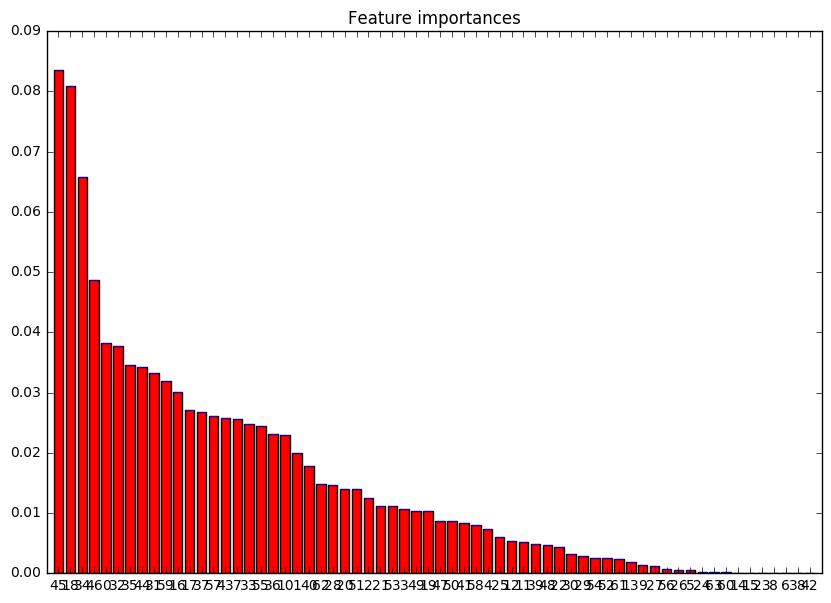

In [147]:
importances = gbc.feature_importances_
estimators = list(gbc.estimators_[0])
std = np.std([tr.feature_importances_ for tr in estimators],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Attribute ranking:")

for f in range(train_X.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. feature %s (%f)" 
              % (f + 1, 
                 train_X.columns.values[indices[f]], 
                 importances[indices[f]]))


plt.figure(figsize=(10,7))
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

Importance tables for different features differ. Main difference - GB incorporates all features, when RF uses only 22.

This may be caused by GB using "weak" learning models. Boosting minimizes error by minimizing bias, and gives each model its small role. It means that all features are used even with very small coefficients. From another point of view, random forest creates each tree as independent and uncorrelated as possible, thus these trees can be called atomic.

# AdaBoostClassifier


In [115]:
from sklearn.ensemble import AdaBoostClassifier as ABC

tuned_parameters = [{'algorithm' : ['SAMME', 'SAMME.R'],
                     'n_estimators' : [50, 100, 150, 200]}]

clf = GridSearchCV(ABC(), tuned_parameters, cv=5)
clf.fit(train_X, train_y)
print("Best parameters set found on development set:\n")
print(clf.best_params_, '\n')
print("Grid scores on development set:\n")
print("Grid scores on development set:")
means = sorted(clf.cv_results_['mean_test_score'], reverse=True)
stds = clf.cv_results_['std_test_score']


# Getting top 5 parameters
for mean, std, params in zip(means[:5], stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" %(mean, std * 2, params))
    abc = ABC(algorithm=params.get('algorithm'),
              n_estimators=params.get('n_estimators')) 
    abc.fit(train_X, train_y)
    print('Accuracy = ', accuracy_score(abc.predict(test_X), test_y))

Best parameters set found on development set:

{'algorithm': 'SAMME', 'n_estimators': 100} 

Grid scores on development set:

Grid scores on development set:
0.908 (+/-0.0365) for {'algorithm': 'SAMME', 'n_estimators': 50}
Accuracy =  0.857142857143
0.905 (+/-0.0329) for {'algorithm': 'SAMME', 'n_estimators': 100}
Accuracy =  0.857142857143
0.902 (+/-0.0460) for {'algorithm': 'SAMME', 'n_estimators': 150}
Accuracy =  0.844155844156
0.902 (+/-0.0518) for {'algorithm': 'SAMME', 'n_estimators': 200}
Accuracy =  0.844155844156
0.898 (+/-0.0636) for {'algorithm': 'SAMME.R', 'n_estimators': 50}
Accuracy =  0.831168831169


Attribute ranking:
1. feature absences_y (0.140000)
2. feature Medu (0.080000)
3. feature Pstatus (0.060000)
4. feature G2_y (0.040000)
5. feature sex (0.040000)
6. feature G3_x (0.040000)
7. feature freetime_y (0.040000)
8. feature G1_y (0.040000)
9. feature Fedu (0.040000)
10. feature failures_y (0.040000)
11. feature G2_x (0.040000)
12. feature nursery (0.040000)
13. feature address (0.020000)
14. feature schoolsup_y (0.020000)
15. feature traveltime_y (0.020000)
16. feature goout_y (0.020000)
17. feature paid_x (0.020000)
18. feature famrel_y (0.020000)
19. feature absences_x (0.020000)
20. feature Fjob_other (0.020000)
21. feature Mjob_health (0.020000)
22. feature G1_x (0.020000)
23. feature studytime_y (0.020000)
24. feature age (0.020000)
25. feature Fjob_services (0.020000)
26. feature guardian_y_other (0.020000)
27. feature Fjob_teacher (0.020000)
28. feature G3_y (0.020000)
29. feature famsup_x (0.020000)
30. feature failures_x (0.020000)


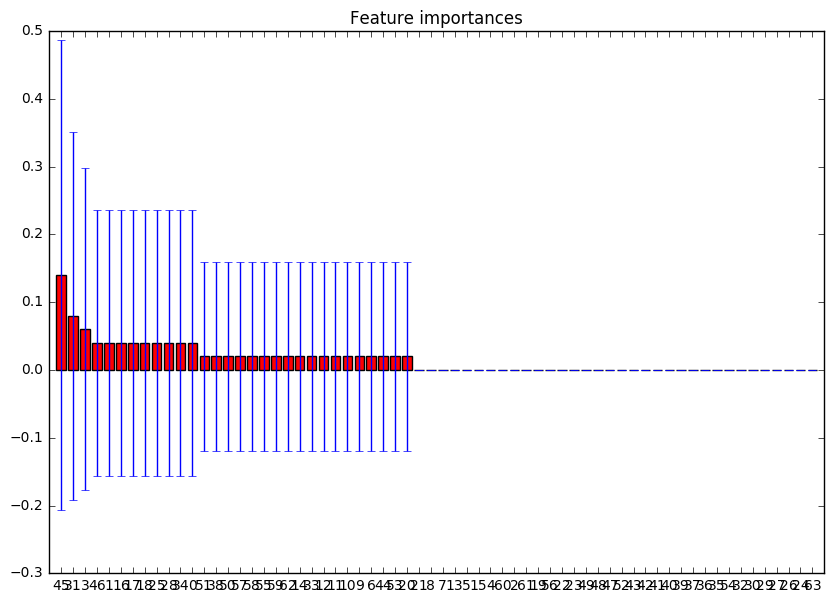

In [117]:
importances = abc.feature_importances_
std = np.std([tr.feature_importances_ for tr in abc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Attribute ranking:")

for f in range(train_X.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. feature %s (%f)" 
              % (f + 1, 
                 train_X.columns.values[indices[f]], 
                 importances[indices[f]]))


plt.figure(figsize=(10,7))
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

# Conclusion

Well, to sum it up,
<br>
according to accuracy score, best result was shown by Random Forest and Gradient Boosting - 89%.
To pick the best of the best, we compare cross-validation score, which is higher in Random Forest:
<br><br>
<strong>
0.915 (+/-0.0162) for {'n_estimators': 2, 'max_depth': 2, 'criterion': 'gini'}<br>
Accuracy =  0.896103896104
</strong>
### Random Forest is the winner